In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import time
import scipy.io
import matplotlib.pyplot as plt
from SNN_JHK_v2_230313 import *

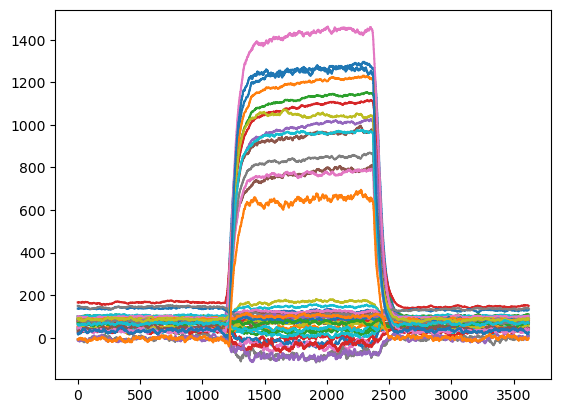

In [2]:
mat = scipy.io.loadmat('DATA/InputSpike_4class.mat')

input = mat['input']
inputTime = mat['inputTime']

plt.plot(inputTime, input[0][42])


In [3]:
ncols, nrows = 7, 3

# receptiveField = [np.array([[20]]),np.array([[5,5],[5,5]]),np.array([[-2,10,-2]])]
receptiveField = [np.array([[20]])]

rf = createReceptiveField(receptiveField, 2, ncols, nrows)

print(rf.shape)
print(rf)
print(len(rf))

weights = Synapse(rf)


Complete! Create 1x1 kernel! with 42 times.
(42, 42)
[[20.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. 20.]]
42


In [4]:
L1_num_neurons = ncols * nrows * 2

input_layer = IzhikevichLayer(0.02, 0.2, -65, 8, L1_num_neurons)

signal_length = inputTime[-1][0]
print(signal_length)


layer initialized
3620


In [5]:
S1 = Synapse(rf)

L2_num_neurons = len(rf)
print('# of Nueons in L2 is ',L2_num_neurons)

second_layer = IzhikevichLayer(0.02, 0.2, -65, 8, L2_num_neurons)

# of Nueons in L2 is  42
layer initialized


0.20291876792907715


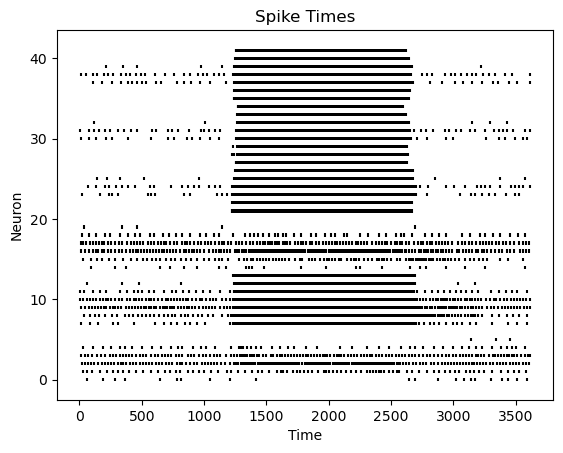

[59, 188, 283, 364, 648, 784, 818, 1051, 1210, 1413, 2648, 2692, 2879, 3018, 3087, 3144, 3177, 3300, 3389, 3441, 3508, 3595, 30, 57, 103, 166, 221, 268, 313, 353, 397, 451, 510, 573, 632, 683, 728, 772, 809, 871, 913, 958, 1003, 1053, 1109, 1183, 1218, 1269, 1326, 1388, 1430, 1466, 1524, 1588, 1615, 1637, 1669, 1713, 1745, 1766, 1801, 1834, 1869, 1914, 1962, 1981, 2004, 2031, 2067, 2096, 2140, 2179, 2222, 2257, 2305, 2335, 2359, 2379, 2402, 2422, 2447, 2480, 2517, 2548, 2565, 2627, 2672, 2724, 2786, 2841, 2888, 2936, 2971, 3010, 3049, 3098, 3133, 3165, 3203, 3244, 3310, 3384, 3435, 3490, 3527, 3585, 17, 44, 66, 90, 117, 151, 182, 209, 231, 255, 279, 310, 332, 353, 375, 403, 427, 456, 487, 508, 533, 557, 585, 613, 638, 665, 692, 717, 740, 782, 803, 825, 855, 888, 917, 946, 982, 1006, 1031, 1055, 1078, 1103, 1134, 1165, 1205, 1238, 1256, 1274, 1294, 1310, 1325, 1343, 1363, 1378, 1393, 1412, 1431, 1449, 1465, 1478, 1492, 1506, 1521, 1537, 1552, 1568, 1582, 1598, 1612, 1625, 1640, 1656, 16

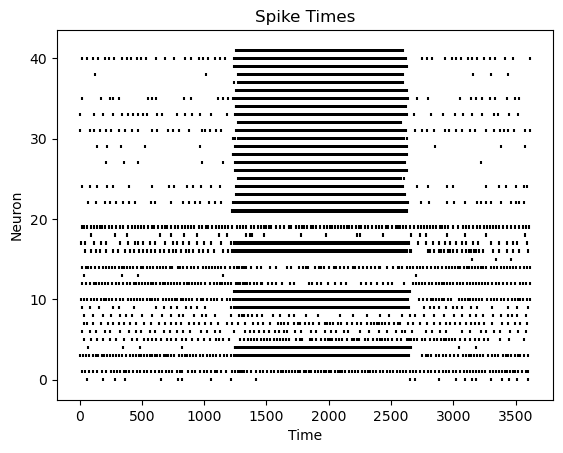

[63, 192, 287, 368, 652, 788, 822, 1055, 1214, 1417, 2652, 2696, 2883, 3022, 3091, 3148, 3181, 3304, 3393, 3445, 3512, 3599, 20, 46, 73, 106, 142, 178, 214, 250, 278, 300, 328, 353, 375, 399, 428, 458, 488, 514, 543, 577, 609, 637, 664, 690, 718, 743, 783, 804, 824, 872, 901, 927, 965, 998, 1024, 1055, 1085, 1107, 1136, 1178, 1223, 1249, 1270, 1291, 1307, 1322, 1340, 1373, 1412, 1450, 1475, 1503, 1540, 1558, 1589, 1614, 1631, 1658, 1681, 1705, 1727, 1750, 1773, 1802, 1820, 1838, 1861, 1889, 1912, 1936, 1959, 1978, 1998, 2019, 2048, 2073, 2090, 2109, 2133, 2164, 2188, 2211, 2236, 2264, 2290, 2314, 2334, 2354, 2382, 2411, 2434, 2466, 2489, 2515, 2545, 2573, 2595, 2618, 2650, 2675, 2701, 2731, 2761, 2793, 2819, 2853, 2884, 2916, 2944, 2968, 3000, 3024, 3057, 3082, 3107, 3130, 3158, 3183, 3205, 3227, 3255, 3291, 3320, 3341, 3364, 3389, 3413, 3434, 3455, 3475, 3495, 3516, 3548, 3581, 3603, 4, 24, 49, 79, 108, 130, 150, 177, 198, 221, 247, 271, 294, 318, 341, 375, 402, 429, 452, 476, 496, 52

In [17]:
# simulation

input_signal = input[0][14]

input_layer_spike_times = np.zeros((L1_num_neurons, signal_length))
second_layer_spike_times = np.zeros((L2_num_neurons, signal_length))

start_time = time.time()

for i in range(len(input_signal)):

    I = input_signal[i] * 0.05
    input_layer.update(I)

    post_input = weights.cal_post_input(input_layer.spikes)
    
    second_layer.update(post_input)

    input_layer_spike_times[:, i] = input_layer.spikes
    second_layer_spike_times[:, i] = second_layer.spikes


end_time = time.time()


vectorized_time = end_time - start_time

print(vectorized_time)

plot_spike_times(input_layer_spike_times)
plot_spike_times(second_layer_spike_times)


In [7]:
a = np.ones((42,1))
a[0]= 0

print(a.shape)
print(rf.shape)

b = np.dot(rf,a)

print(b.shape)

(42, 1)
(42, 42)
(42, 1)


In [8]:
# Define input
x = np.array([1, 2, 3])

print(x.shape)
# Define weight and bias
w = np.array([0.5, -0.2, 0.1])
b = 0.3
print(w.shape)
# Compute output
y = np.dot(w, x) + b

# Print output
print(y)


(3,)
(3,)
0.7
